# First Assignment
## Image Processing
### 4th CSE 2020

Name : Aya Osama Abdelaziz Mohamed

ID : 1500383

Email : ayao21684@gmail.com

# 1 Medical Imaging
#### ( 4 marks)
Medical imaging is the procedure used to attain images of the body parts for medical uses in order to identify or study diseases. There are millions of imaging procedures done every week worldwide. Medical imaging is developing rapidly due to developments in image processing techniques including image recognition, analysis, and enhancement.

*as for this assignment we will be using image enhancement to detect tumors in brain.*

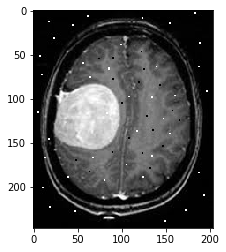

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('imagessaltandpeper.jpg')

plt.imshow(image)

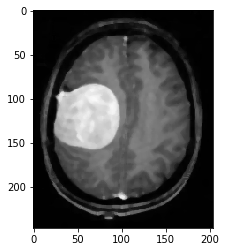

In [0]:
# TODO: use a proper spatial filter to remove the noise on the brain MR image ( 1 mark )
# Then display the result

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

#%matplotlib inline
#from IPython import get_ipython
#get_ipython().run_line_magic('matplotlib', 'inline')
# Read in the image
image = mpimg.imread('imagessaltandpeper.jpg')

median = cv2.medianBlur(image,5)
#hist = cv2.calcHist([median],[0],None,[256],[0,256])
#plt.subplot(121)
plt.imshow(median)



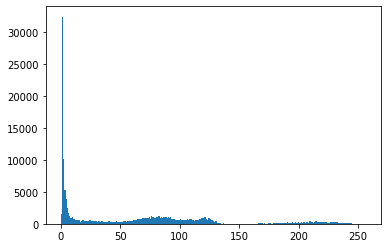

In [0]:
# TODO: Plot a histogram to see the place of the tumor ( 1 mark )
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 23 23:02:36 2020

@author: Aya Osama
"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

image = mpimg.imread('imagessaltandpeper.jpg')

median = cv2.medianBlur(image,5)

#plt.subplot(122)
plt.hist(median.ravel(),256,[0,256]);

In [0]:
# TODO: Create a function to detect wether there is a tumor or no ( 2 marks )
# HINT: the histogram in the last cell will help you
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import ndarray
import cv2
import numpy as np
image = mpimg.imread('imagessaltandpeper.jpg')
def detection(brain_im):
    status = ""
    ## your code here ##
 #   image = mpimg.imread('imagessaltandpeper.jpg')
    median = cv2.medianBlur(image,5)
    ret,thr = cv2.threshold(median,150,255,cv2.THRESH_BINARY_INV)

    plt.subplot(221)
    plt.imshow(thr)
    

    #plt.subplot(222)
    #plt.hist(thr.ravel(),256,[0,256]);    #plt.hist(thr.ravel(),256)
    histr = cv2.calcHist([thr],[0],None,[256],[0,256]) 
   # plt.plot(histr)
    #plt.show()
    if histr[0] != 0:
        print("Tumor Detected")
    else:
        print("Tumor Not Detected")
    return status

Tumor Detected



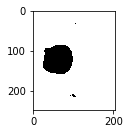

In [218]:
status = detection(image) # you can change image name according to the filtered one
print(status)
## note: output should be for ex:"Tumor Detected" or "Tumor Not Detected"

# 2 Image Coloring
#### (1 mark)
Color is a powerful descriptor that often simplifies object identification and extraction from a scene. 

*In this part of the assignment you will practice on colored image*

from google.colab import drive
drive.mount('/content/drive')

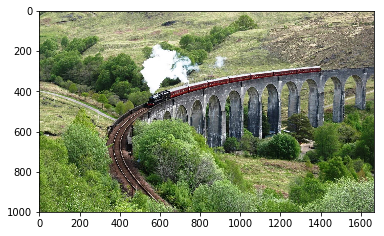

In [0]:
# Read in the image
image = mpimg.imread('images/HP_train.jpg')

plt.imshow(image)

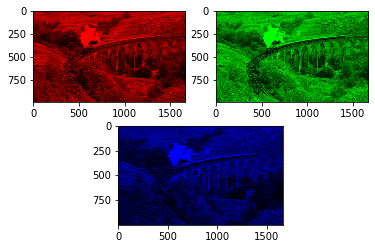

In [0]:
# TODO: Plot the image in its 3 channels (R & G & B)

# -*- coding: utf-8 -*-
"""
Created on Sun Feb 23 23:15:18 2020

@author: Aya Osama
"""

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from copy import deepcopy
import cv2
import numpy as np

# Read in the image 
image = mpimg.imread('HP_train.jpg') 
plt.imshow(image)

red = deepcopy(image)
green = deepcopy(image)
blue = deepcopy(image)

red[:,:,2] = 0    #red
red[:,:,1] = 0    #red
red[:,:,0]    #red

blue[:,:,2]    #blue
blue[:,:,1] = 0   #blue
blue[:,:,0] = 0   #blue

green[:,:,1]     #green
green[:,:,2] = 0    #green
green[:,:,0] = 0    #green

plt.subplot(221)
plt.imshow(red)

plt.subplot(222)
plt.imshow(green)

plt.subplot(212)
plt.imshow(blue)


## BONUS
#### ( 1 bonus mark )

You need to remove the green screen behind Ron's car and insert it to fly above the train to reach Hogwarts!

Image dimensions: (938, 1500, 3)


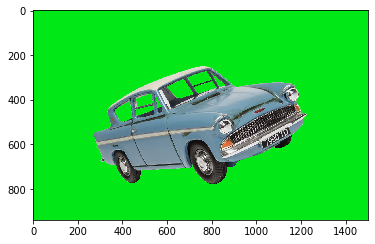

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from copy import deepcopy
import cv2
import numpy as np

# Read in the image
image = mpimg.imread('HP_Green.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)

# Display the image
plt.imshow(image)

### Define the color threshold

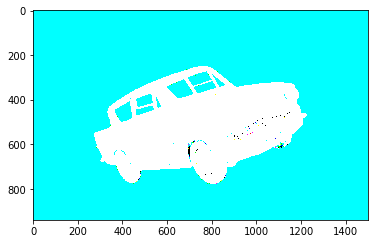

In [220]:
def color_filter(image, r, g, b):
    colors = [b, g, r]
    result = np.zeros(image.shape, dtype=np.uint8)
    for i in range(3):
        result[:, :, i] = np.where(image[:, :, i] < colors[i], 0, 255)
    return result.astype(np.uint8)
image = mpimg.imread('HP_Green.jpg')
status= color_filter(image,11,12,17)
plt.imshow(status)

In [0]:
## TODO: Define our color selection boundaries in RGB values "change those numbers"
lower_green = np.array([40,120,200]) #BGR
upper_green = np.array([220, 230, 240])
#22,232,0
#lower_green = np.array([35, 140, 60]) #BGR
#upper_green = np.array([220, 230, 240])

### Create a mask

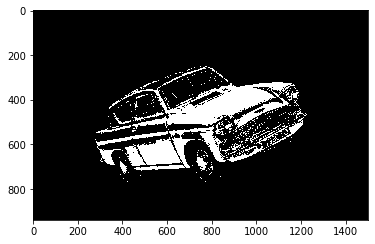

In [225]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

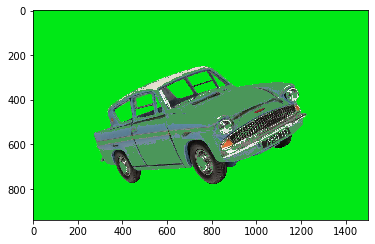

In [226]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [75,150,90]
#22,232,0
#lower_green = np.array([35, 140, 60]) #BGR
#upper_green = np.array([220, 230, 240])
# Display it!
plt.imshow(masked_image)

### Mask and add a background image

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
#import numpy as np
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('HP_train.jpg')

## TODO: Crop it or resize the background to be the right size (938x1500)
## TODO: Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image

## TODO: Display the background and make sure

### Create a complete image

In [0]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background


# Congratulations! You have finished your first assignment